## Final Project Submission

Please fill out:
* Student name: Kevin Evans & Jonathan Vasquez
* Student pace: Full Time
* Scheduled project review date/time: 07/10/2020
* Instructor name: Sean Wilson
* Blog post URL:


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
import itertools
import warnings

from pandas import set_option
plt.style.use('ggplot')
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from IPython.display import Image  
import pydotplus

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 

from scipy.stats import randint

from sklearn.linear_model import LogisticRegression 

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.utils import resample

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Data info is here:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

#### Drug Usuage Identifier
* CL0 Never Used
* CL1 Used over a Decade Ago  
* CL2 Used in Last Decade 
* CL3 Used in Last Year  
* CL4 Used in Last Month  
* CL5 Used in Last Week 
* CL6 Used in Last Day

#### Drug Definition

* Amyl Nitrite (AKA Poppers, similar to acid (LSD) and ecstasy)
* Legal High (AKA Bath Salts,avaliable to buy OTC)
* VSA (Volatile Substance Abuse, glue/marker sniffers)

# Importing/Inspecting Data

In [94]:
df = pd.read_csv('drug_consumption.csv', index_col=0)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [95]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

# Data Cleaning

In [96]:
df.isnull().any() #No missing values

Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

# User or Non-User of Crack

In [97]:
df['Crack_User'] = np.where(df['Crack'].isin(['CL2','CL3','CL4','CL5','CL6']), 1, 0)

In [98]:
df['Crack_User'].value_counts()

0    1694
1     191
Name: Crack_User, dtype: int64

In [99]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Crack_User
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0


In [100]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'Crack_User'],
      dtype='object')

In [101]:
drugs = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA']

In [140]:
cats = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

In [102]:
df = pd.get_dummies(data=df, columns=drugs, drop_first=True)

In [103]:
features

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol_CL1,Alcohol_CL2,Alcohol_CL3,Alcohol_CL4,Alcohol_CL5,Alcohol_CL6,Amphet_CL1,Amphet_CL2,Amphet_CL3,Amphet_CL4,Amphet_CL5,Amphet_CL6,Amyl_CL1,Amyl_CL2,Amyl_CL3,Amyl_CL4,Amyl_CL5,Amyl_CL6,Benzos_CL1,Benzos_CL2,Benzos_CL3,Benzos_CL4,Benzos_CL5,Benzos_CL6,Caff_CL1,Caff_CL2,Caff_CL3,Caff_CL4,Caff_CL5,Caff_CL6,Cannabis_CL1,Cannabis_CL2,Cannabis_CL3,Cannabis_CL4,Cannabis_CL5,Cannabis_CL6,Choc_CL1,Choc_CL2,Choc_CL3,Choc_CL4,Choc_CL5,Choc_CL6,Coke_CL1,Coke_CL2,Coke_CL3,Coke_CL4,Coke_CL5,Coke_CL6,Ecstasy_CL1,Ecstasy_CL2,Ecstasy_CL3,Ecstasy_CL4,Ecstasy_CL5,Ecstasy_CL6,Heroin_CL1,Heroin_CL2,Heroin_CL3,Heroin_CL4,Heroin_CL5,Heroin_CL6,Ketamine_CL1,Ketamine_CL2,Ketamine_CL3,Ketamine_CL4,Ketamine_CL5,Ketamine_CL6,Legalh_CL1,Legalh_CL2,Legalh_CL3,Legalh_CL4,Legalh_CL5,Legalh_CL6,LSD_CL1,LSD_CL2,LSD_CL3,LSD_CL4,LSD_CL5,LSD_CL6,Meth_CL1,Meth_CL2,Meth_CL3,Meth_CL4,Meth_CL5,Meth_CL6,Mushrooms_CL1,Mushrooms_CL2,Mushrooms_CL3,Mushrooms_CL4,Mushrooms_CL5,Mushrooms_CL6,Nicotine_CL1,Nicotine_CL2,Nicotine_CL3,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6,Semer_CL1,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0

In [128]:
df.Crack.value_counts()

CL0    1627
CL2     112
CL1      67
CL3      59
CL5       9
CL4       9
CL6       2
Name: Crack, dtype: int64

In [104]:
target = df['Crack_User']

In [141]:
features = df.drop(columns=['Crack_User', 'Crack']+cats)

In [143]:
features

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol_CL1,Alcohol_CL2,Alcohol_CL3,Alcohol_CL4,Alcohol_CL5,Alcohol_CL6,Amphet_CL1,Amphet_CL2,Amphet_CL3,Amphet_CL4,Amphet_CL5,Amphet_CL6,Amyl_CL1,Amyl_CL2,Amyl_CL3,Amyl_CL4,Amyl_CL5,Amyl_CL6,Benzos_CL1,Benzos_CL2,Benzos_CL3,Benzos_CL4,Benzos_CL5,Benzos_CL6,Caff_CL1,Caff_CL2,Caff_CL3,Caff_CL4,Caff_CL5,Caff_CL6,Cannabis_CL1,Cannabis_CL2,Cannabis_CL3,Cannabis_CL4,Cannabis_CL5,Cannabis_CL6,Choc_CL1,Choc_CL2,Choc_CL3,Choc_CL4,Choc_CL5,Choc_CL6,Coke_CL1,Coke_CL2,Coke_CL3,Coke_CL4,Coke_CL5,Coke_CL6,Ecstasy_CL1,Ecstasy_CL2,Ecstasy_CL3,Ecstasy_CL4,Ecstasy_CL5,Ecstasy_CL6,Heroin_CL1,Heroin_CL2,Heroin_CL3,Heroin_CL4,Heroin_CL5,Heroin_CL6,Ketamine_CL1,Ketamine_CL2,Ketamine_CL3,Ketamine_CL4,Ketamine_CL5,Ketamine_CL6,Legalh_CL1,Legalh_CL2,Legalh_CL3,Legalh_CL4,Legalh_CL5,Legalh_CL6,LSD_CL1,LSD_CL2,LSD_CL3,LSD_CL4,LSD_CL5,LSD_CL6,Meth_CL1,Meth_CL2,Meth_CL3,Meth_CL4,Meth_CL5,Meth_CL6,Mushrooms_CL1,Mushrooms_CL2,Mushrooms_CL3,Mushrooms_CL4,Mushrooms_CL5,Mushrooms_CL6,Nicotine_CL1,Nicotine_CL2,Nicotine_CL3,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6,Semer_CL1,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1885,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1886,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [151]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

In [152]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

In [153]:
logreg = LogisticRegression(class_weight='balanced', penalty='l1')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

logreg_f1 = metrics.f1_score(y_test, logreg_preds)
logreg_acc = metrics.accuracy_score(y_test, logreg_preds)

print('Test F1:' , logreg_f1)
print('Test ACC:' , logreg_acc)

Test F1: 0.5172413793103449
Test ACC: 0.8514588859416445


In [154]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn)
knn_acc = metrics.accuracy_score(y_test, y_pred_knn)

print('F1:' + str(knn_f1))
print('Accuracy:' + str(knn_acc))

F1:0.0
Accuracy:0.9045092838196287


In [155]:
tree = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_f1 = metrics.f1_score(tree_pred, y_test)
tree_acc = metrics.accuracy_score(tree_pred, y_test)
print('Test F1 score: ', tree_f1)
print('Test Accuracy score: ', tree_acc)

Test F1 score:  0.38297872340425526
Test Accuracy score:  0.8461538461538461


In [156]:
forest = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1, n_estimators = 10)

In [157]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [158]:
forest_preds = forest.predict(X_test)

In [159]:
forest_f1 = metrics.f1_score(y_test, forest_preds)
forest_acc = metrics.accuracy_score(y_test, forest_preds)
print('Test F1 score: ', forest_f1)
print('Test Accuracy score: ', forest_acc)

Test F1 score:  0.09523809523809522
Test Accuracy score:  0.8992042440318302


In [160]:
forest_params = { 
    'n_estimators': [100, 200, 300, 400],
    'max_features': [.25, .5, .75],
    'max_depth' : [5, 10, 15],
    'criterion' : ['gini','entropy']
    
}

In [161]:
blank_forest = RandomForestClassifier(random_state = 1, class_weight='balanced')

forest_grid = GridSearchCV(estimator=blank_forest, param_grid=forest_params, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
forest_grid.fit(X_train, y_train)

print(forest_grid.best_params_)
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.9s finished
/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
0.4706529580534886


In [63]:
best_forest = forest_grid.best_estimator_

bf_preds = best_forest.predict(X_test)
bf_f1 = metrics.f1_score(y_test, bf_preds)
bf_acc = metrics.accuracy_score(y_test, bf_preds)

print('Test F1 score: ', bf_f1)
print('Test Accuracy score: ', bf_acc)

Test F1 score:  0.42857142857142855
Test Accuracy score:  0.8514588859416445


In [64]:
forest_params_2 = { 
    'n_estimators': [250, 300, 350],
    'max_features': [.2,.25],
    'max_depth' : [3,5,7],
    'criterion' : ['entropy']
    
}

forest_grid_2 = GridSearchCV(estimator=blank_forest, param_grid=forest_params_2, cv=5, scoring='f1', verbose=1, n_jobs=-1)
forest_grid_2.fit(X_train, y_train)

print(forest_grid_2.best_params_)
print(forest_grid_2.best_estimator_)
print(forest_grid_2.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.5s finished


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
0.4593368106078144


In [65]:
best_forest = forest_grid_2.best_estimator_

bf_preds = best_forest.predict(X_test)
bf_f1 = metrics.f1_score(y_test, bf_preds)
bf_acc = metrics.accuracy_score(y_test, bf_preds)

print('Test F1 score: ', bf_f1)
print('Test Accuracy score: ', bf_acc)

Test F1 score:  0.42857142857142855
Test Accuracy score:  0.8514588859416445


In [133]:
print(metrics.confusion_matrix(y_test, bf_preds))


[[300  42]
 [ 14  21]]


In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,bf_preds)
classes = ['Not_Crack_User', 'Crack_User']


Confusion Matrix, without normalization
[[300  42]
 [ 14  21]]


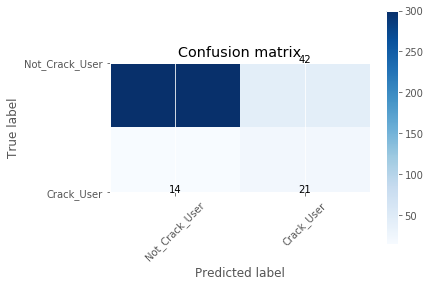

In [135]:
# IMPORTANT: first argument is true values, second argument is predicted values
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)